# **Laboratorijska vježba 8**: Zadaci za samostalni rad

## **Klasifikacija zrna pšenice**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka koji sadrži podatke o zrnima triju različitih sorti pšenice: Kama, Rosa i Kanadska. Za svaku klasu snimljen je popriličan broj slika tehnikom mekih rendgenskih zraka. Iz slika su izvučene značajke koje opisuju oblik zrna.


In [4]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [6]:
seeds = pd.read_csv("Data/seeds.csv")
seeds.head()

ID   area  perimeter  compactness  lengthOfKernel  widthOfKernel  \
0   1  15.26      14.84       0.8710           5.763          3.312   
1   2  14.88      14.57       0.8811           5.554          3.333   
2   3  14.29      14.09       0.9050           5.291          3.337   
3   4  13.84      13.94       0.8955           5.324          3.379   
4   5  16.14      14.99       0.9034           5.658          3.562   

   asymmetryCoefficient  lengthOfKernelGroove  seedType  
0                 2.221                 5.220         1  
1                 1.018                 4.956         1  
2                 2.699                 4.825         1  
3                 2.259                 4.805         1  
4                 1.355                 5.175         1

## **Zadatak 1: Priprema skupa podataka**

Predobradite skup podataka na način da zadržite samo smislene značajke. Iscrtajte histogram vrijednosti za svaku značajku.

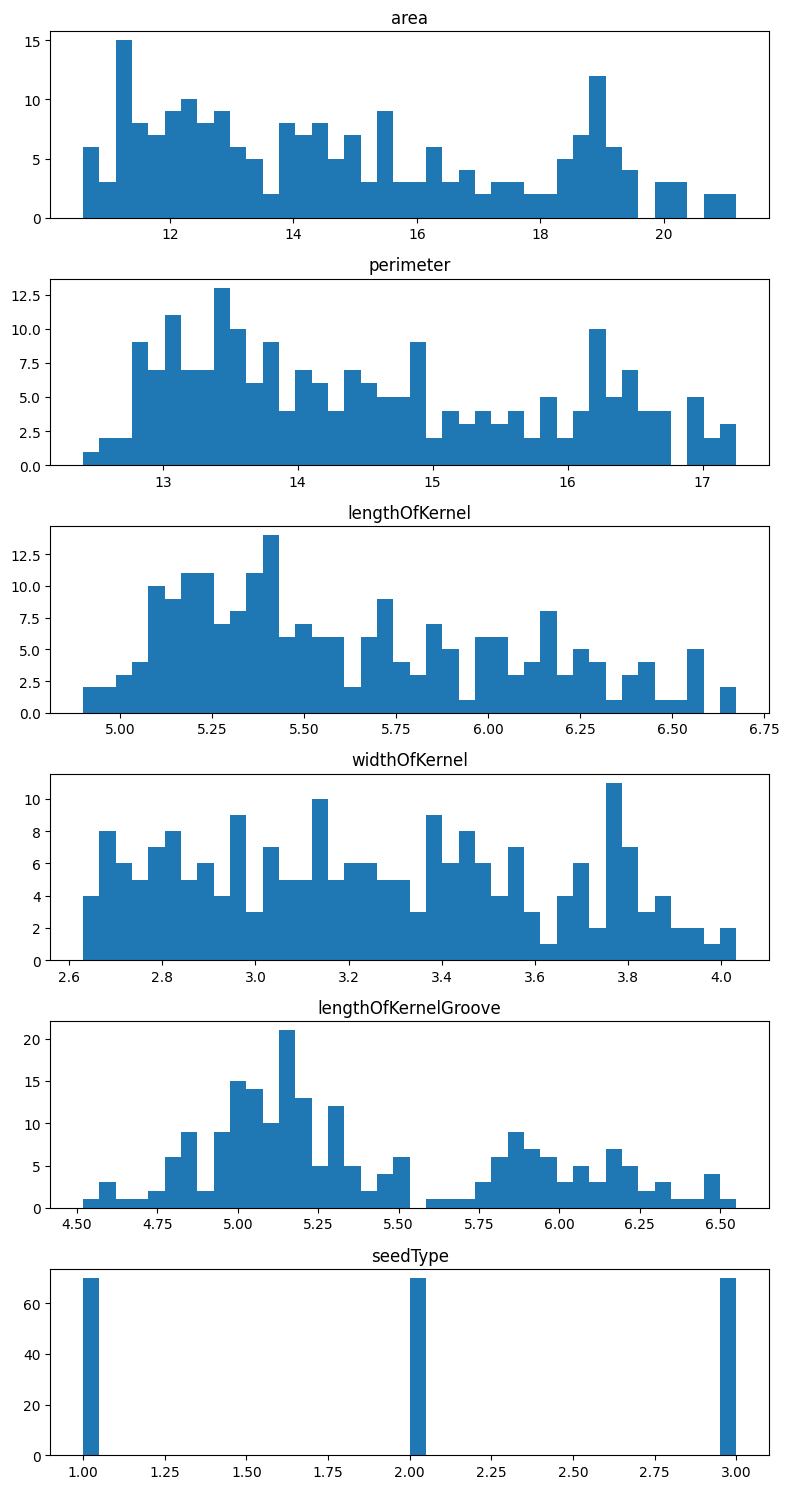

In [7]:
seed_features = seeds[["area","perimeter","lengthOfKernel","widthOfKernel","lengthOfKernelGroove","seedType"]]

#all on the same plot:

# labels = []
# for column in seed_features.columns:
#   labels.append(column)
#   plt.hist(seed_features[column])
# plt.legend(labels)
# plt.ylabel("count")

#every hist is on seperate subplot:

# Create subplots for each column
fig, axes = plt.subplots(nrows=len(seed_features.columns), figsize=(8, 15))

for i, column in enumerate(seed_features.columns):
    axes[i].hist(seed_features[column],bins=40)
    axes[i].set_title(column)  # Set title for each subplot

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

S obzirom na to da značajke imaju različite intervale vrijednosti, poželjno ih je normalizirati. Normalizirajte značajke prigodnom metodom normalizacije. 

In [8]:
scaler = StandardScaler()
#scale using Standars Scaler
seed_features_scaled = scaler.fit_transform(seed_features)
#convert back to pandas DataFrame
seed_features_scaled = pd.DataFrame(seed_features_scaled,columns=seed_features.columns)
seed_features_scaled

area  perimeter  lengthOfKernel  widthOfKernel  lengthOfKernelGroove  \
0    0.142098   0.215462        0.304218       0.141702             -0.383577   
1    0.011188   0.008224       -0.168625       0.197432             -0.922013   
2   -0.192067  -0.360201       -0.763637       0.208048             -1.189192   
3   -0.347091  -0.475333       -0.688978       0.319508             -1.229983   
4    0.445257   0.330595        0.066666       0.805159             -0.475356   
..        ...        ...             ...            ...                   ...   
205 -0.915515  -1.043321       -1.112048      -0.736716             -1.097413   
206 -1.246235  -1.288937       -1.105261      -1.230328             -0.826156   
207 -0.567571  -0.690247       -0.888070      -0.070604             -0.718060   
208 -1.036090  -1.035645       -1.026077      -1.121521             -0.742535   
209 -0.877620  -0.935864       -0.872233      -0.755292             -0.703784   

     seedType  
0   -1.224745  
1   -1.224745  
2   -1.224745  
3   -1.224745  
4   -1.224745  
..        ...  
205  1.224745  
206  1.224745  
207  1.224745  
208  1.224745  
209  1.224745  

[210 rows x 6 columns]

## **Zadatak 2: Grupiranje pomoću algoritma $k$-means**

Pomoću metode lakta pronađite najprikladniju vrijednost za parametar $k$ u algoritmu $k$-means.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

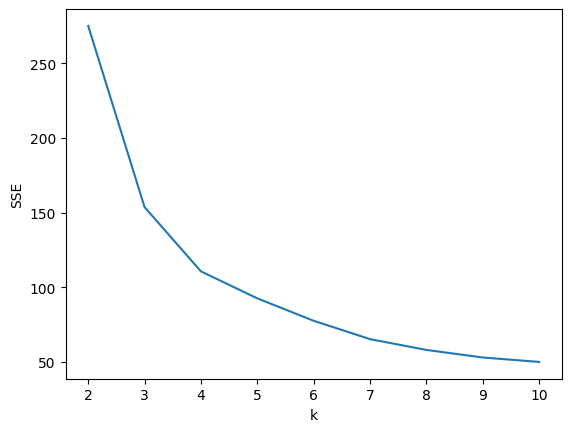

In [14]:
X = seed_features_scaled.iloc[:,:-1]
y = seed_features_scaled.iloc[:,-1]
def plot_sse(features_X, start=2, end=11):
    sse = []
    for k in range(start, end):
        # Assign the labels to the clusters
        kmeans = KMeans(n_clusters=k, random_state=10).fit(features_X)
        sse.append({"k": k, "sse": kmeans.inertia_})

    sse = pd.DataFrame(sse)
    # Plot the data
    plt.plot(sse.k, sse.sse)
    plt.xlabel("k")
    plt.ylabel("SSE")
    
plot_sse(X)
#najprikladnija vrijednost za k je 3

## **Zadatak 3: Vizualizacija grupa algoritma $k$-means**

Pomoću t-SNE metode za smanjenje dimenzionalnosti svedite skup podataka na dvije komponente.  

In [19]:
tsne = TSNE(n_components=2, random_state=50)
X_tsne = tsne.fit_transform(X)
# print(X_tsne)
plt.scatter(X_tsne[:,0],X_tsne[:,1], c=y)
plt.show()

Zatim grupirajte skup podataka pomoću algoritma $k$-means, gdje za parametar $k$ koristite najbolju vrijednost iz prošlog zadatka.

In [21]:
kmeans = KMeans(n_clusters=3, random_state=10).fit(X_tsne)
labels = kmeans.labels_
plt.scatter(X_tsne[:,0],X_tsne[:,1], c=labels)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pomoću dva dijagrama raspršenosti vizualizirajte skup podataka prije (s poznatim oznakama klasa) i nakon grupiranja (s novododanim oznakama grupa). 

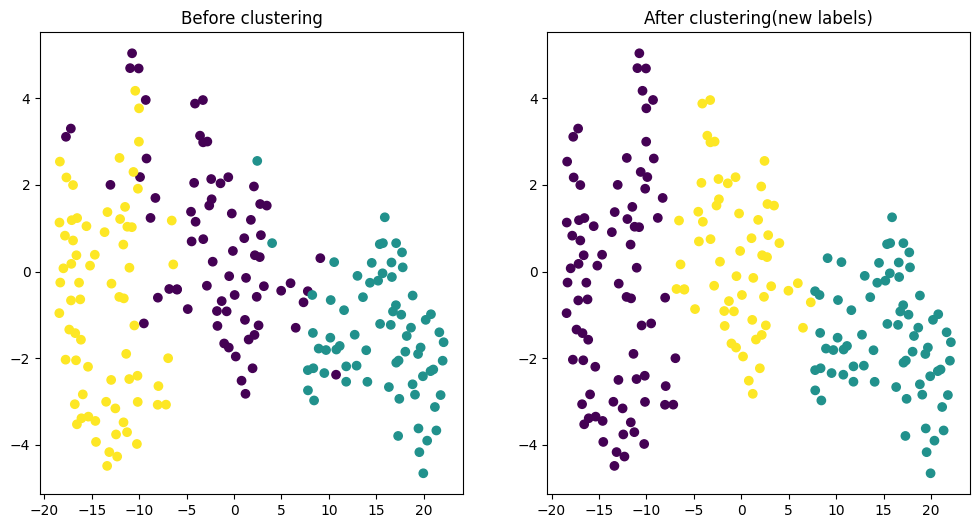

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.scatter(X_tsne[:,0],X_tsne[:,1],c=y)
ax1.set_title("Before clustering")

ax2.scatter(X_tsne[:,0],X_tsne[:,1],c=labels)
ax2.set_title("After clustering(new labels)")

plt.show()


# **Klasifikacija sorti vina**

U ovoj laboratorijskoj vježbi također ćemo istražiti skup podataka koji sadrži podatke o različitim sortama vina. Skup podataka sadrži značajke koje predstavljaju rezultate kemijske analize vina uzgojenih u istoj regiji u Italiji, ali koja potječu od tri različite sorte. Kemijskom analizom su utvrđene količine 13 sastojaka koji se nalaze u svakoj od tri vrste vina.


In [33]:
wine = pd.read_csv("Data/wine.csv")
wine.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

## **Zadatak 4: Grupiranje pomoću algoritma $k$-means**

U skupu podataka retci nemaju oznake. Pomoću algoritma $k$-means grupirajte skup podataka te definirajte nedostajuće oznake. Odaberite prikladan broj grupa. Provjerite ima li normalizacija značajki utjecaj na performanse algoritma $k$-means.



In [45]:
#odredivanje najprikladnijeg broja k koristeci metodu lakta
def plot_sse(features_X, start=2, end=11):
    sse = []
    for k in range(start, end):
        # Assign the labels to the clusters
        kmeans = KMeans(n_clusters=k, random_state=10).fit(features_X)
        sse.append({"k": k, "sse": kmeans.inertia_})

    sse = pd.DataFrame(sse)
    # Plot the data
    plt.plot(sse.k, sse.sse)
    plt.xlabel("k")
    plt.ylabel("SSE")
    
plot_sse(wine)
#najprikladnija vrijednost za k je 3

kmeans = KMeans(n_clusters=3,random_state=10).fit(wine)
labels_original = kmeans.labels_

#dodavanje nedostajecih oznaka
wine['ClustersOriginal'] = labels_original

# #skaliranje
scaler = StandardScaler()
#scale using Standars Scaler
wine_scaled = scaler.fit_transform(wine)
#convert back to pandas DataFrame
wine_scaled = pd.DataFrame(wine_scaled,columns=wine.columns)

kmeans = KMeans(n_clusters=3,random_state=10).fit(wine_scaled)
labels_normalized = kmeans.labels_

wine['ClustersNormalized'] = labels_normalized

print(wine[['ClustersOriginal','ClustersNormalized']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

     ClustersOriginal  ClustersNormalized
0                   0                   0
1                   0                   0
2                   0                   0
3                   0                   0
4                   1                   0
..                ...                 ...
173                 1                   1
174                 1                   1
175                 1                   1
176                 1                   1
177                 2                   1

[178 rows x 2 columns]


Pomoću t-SNE metode za smanjenje dimenzionalnosti svedite skup podataka na dvije komponente te vizualizirajte novostvorene grupe.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


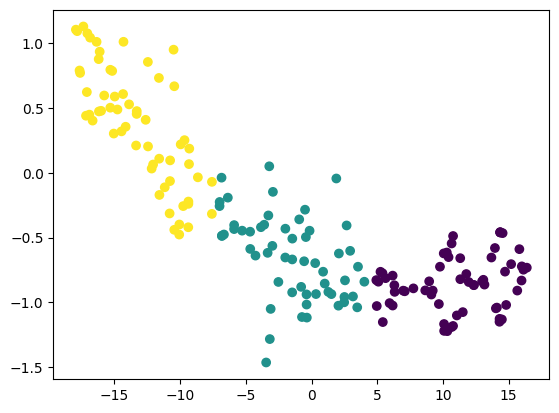

In [38]:
tsne = TSNE(n_components=2, random_state=50)
#smanjenje dimenzionalnosti na dvije komponente
X_tsne = tsne.fit_transform(wine)
# print(X_tsne)
kmeans = KMeans(n_clusters=3,random_state=10).fit(X_tsne)
labels = kmeans.labels_
#vizualizacija novih grupa
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels)
plt.show()



## **Zadatak 5: Grupiranje pomoću algoritma DBSCAN**

U skupu podataka retci nemaju oznake. Pomoću algoritma DBSCAN grupirajte skup podataka te definirajte nedostajuće oznake. Odaberite prikladan broj grupa.



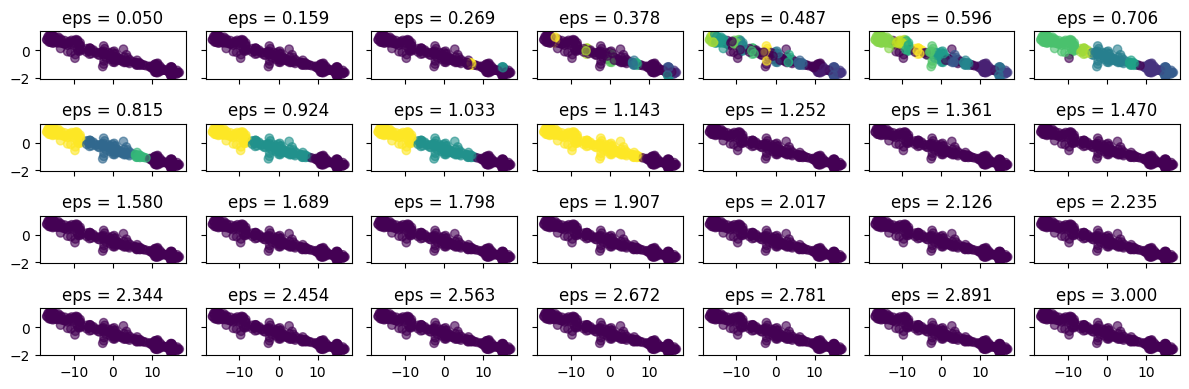

In [49]:
tsne = TSNE(n_components=2, random_state=50)
#smanjenje dimenzionalnosti na dvije komponente
X_tsne = tsne.fit_transform(wine)

# Lista epsilon vrijednosti
eps_list = np.linspace(0.05, 3, 28)

COLUMNS = 7
ROWS = math.ceil(len(eps_list)/COLUMNS)

fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(12, 4), sharey=True, sharex=True)

for i in range(0, len(eps_list)):
    eps = eps_list[i]
    
    current_column = i%COLUMNS
    current_row = i//COLUMNS
    
    ax = axs[current_row, current_column]
    labels = DBSCAN(eps=eps).fit_predict(X_tsne)
    ax.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, alpha=0.6)
    ax.set_title("eps = {:.3f}".format(eps))
    
plt.tight_layout()

Pomoću t-SNE metode za smanjenje dimenzionalnosti svedite skup podataka na dvije komponente te vizualizirajte novostvorene grupe.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


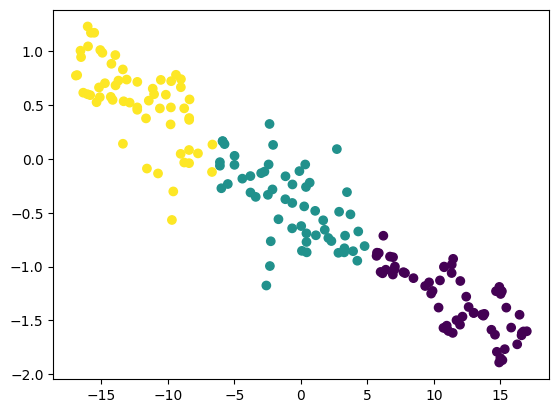

In [50]:


kmeans = KMeans(n_clusters=3,random_state=10).fit(X_tsne)
labels = kmeans.labels_

#vizualizacija novih grupa
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels)
plt.show()

